In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.getcwd()

'C:\\Users\\Admin\\3D Objects\\imarticus PGDA\\Machine learning\\NEW DATASET\\Class Hackathon\\Black Sales'

In [7]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [8]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [12]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [13]:
print('train',df_train.shape,'test',df_test.shape)

train (550068, 12) test (233599, 11)


# DATASET INFORMATION

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
Data

Variable	Definition

User_ID	User ID

Product_ID	Product ID

Gender	Sex of User

Age	Age in bins

Occupation	Occupation (Masked)

City_Category	Category of the City (A,B,C)

Stay_In_Current_City_Years	Number of years stay in current city

Marital_Status	Marital Status


Product_Category_1	Product Category (Masked)

Product_Category_2	Product may belongs to other category also (Masked)

Product_Category_3	Product may belongs to other category also (Masked)

Purchase	Purchase Amount (Target Variable)

Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".



### Visualization of Features

KeyboardInterrupt: 

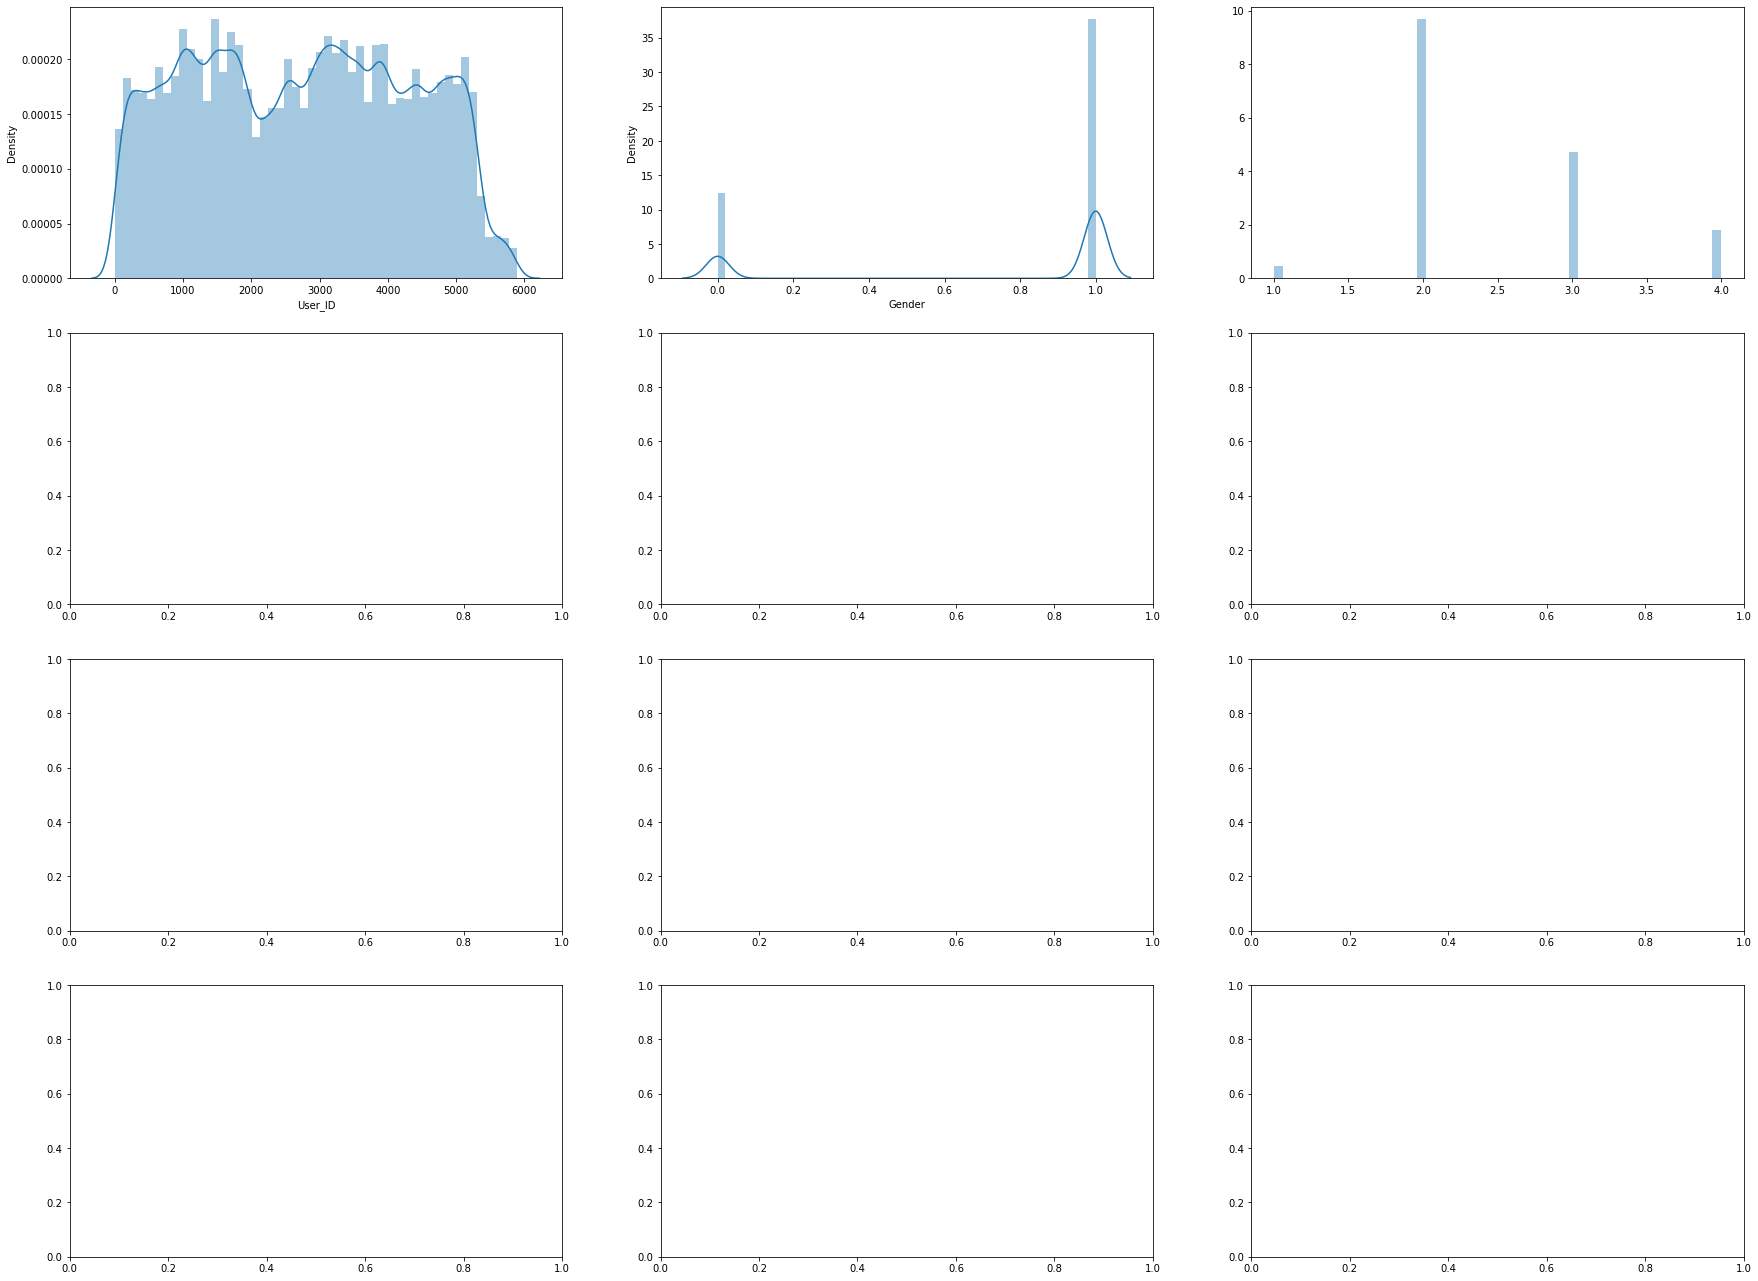

In [318]:
# ploting the distplot of numerical columns
df_train_plot=df_train_final.drop(['Product_ID'],axis=1)

fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(30,23))


for  variable, subplot in zip(df_train_plot, ax.flatten()):
    
    sns.distplot(df_train_plot[variable],kde=True,ax = subplot)

In [ ]:
#Categorical Features
fig=df.hist(figsize=(18,18))

### Sample Submission

In [14]:
df_sample=pd.read_csv('sample_submission.csv')
df_sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [15]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [16]:
# statistical summary

#numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [17]:
#categorical features
df.describe(include=object).T

,count,unique,top,freq
Product_ID,783667,3677,P00265242,2709
Gender,783667,2,M,590031
Age,783667,7,26-35,313015
City_Category,783667,3,B,329739
Stay_In_Current_City_Years,783667,5,1,276425




# 2. EDA 

### 2.1 Treating the NULLS

In [18]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
Product_Category_3,545809,69.648078
Product_Category_2,245982,31.388587
Purchase,233599,29.808452
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


In [19]:
# age ,stay in cuurent years
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
#fig=df.hist(figsize=(18,18))
#sns.heatmap(df.corr(),annot =True)

### Treating the nulls of product category 2 using User_ID 

In [21]:
from scipy.stats import mode
p2_mode=df.pivot_table(values='Product_Category_2',index=['User_ID'],aggfunc=lambda x:mode(x).mode[0])
p2_mode

,Product_Category_2
User_ID,
1000001,4.0
1000002,8.0
1000003,2.0
1000004,2.0
1000005,8.0
...,...
1006036,8.0
1006037,8.0
1006038,14.0


In [22]:
p2bool=df.Product_Category_2.isnull()
df.loc[p2bool,'Product_Category_2']=df.loc[p2bool,'User_ID'].apply(lambda x:p2_mode.loc[x])


### Treating the nulls of product category 3  by User_ID

In [23]:
p3_mode=df.pivot_table(values='Product_Category_3',index=['User_ID'],aggfunc=lambda x:mode(x).mode[0])
p3_mode


,Product_Category_3
User_ID,
1000001,12.0
1000002,14.0
1000003,5.0
1000004,14.0
1000005,16.0
...,...
1006036,15.0
1006037,16.0
1006038,17.0


we need to find the index or location of the customers whose User_ID is  not 1000492 
which are having complete null values in Product category3 column because wherever the user id is 1000492
we have all null values in product category3 columns so no mode values are there ,but null values of product 3 exist for
these user_IDs so we need to fill the mode values other than these IDs first and later treat thesE nulls on these 1000492 location

In [24]:
# checking the nulls other than'User_ID'=1000492 
df[df['User_ID']!=1000492].isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545786
Purchase                      233591
dtype: int64

In [25]:
# filling the nulls 
#df.loc[p3_bool,'Product_Category_3']=df.loc[p3_bool,'User_ID'].apply(lambda x:p3_mode.loc[x])

In [26]:
# so it was complicated to fill null values using User_ID so we try to do it simply
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0],inplace=True)                

### Checking the nulls again

In [27]:
nulls=df.isnull().sum()
nulls=pd.DataFrame({'count':nulls,'percent':(nulls/df.shape[0])*100})
nulls.sort_values('percent',ascending=False)

,count,percent
Purchase,233599,29.808452
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000


### Feature Engineering

### User_ID

In [28]:
len(df['User_ID'].unique())
   

5891

In [29]:
# Numerical Encoding of Unique values of User_ID column
count=0
for i in df['User_ID'].unique():
    df['User_ID'].replace(i,count,inplace=True)
    count+=1
df['User_ID']    

0            0
1            0
2            0
3            0
4            1
          ... 
783662    5328
783663    5328
783664    5328
783665    5329
783666    5330
Name: User_ID, Length: 783667, dtype: int64

In [30]:
df['User_ID'].unique()

array([   0,    1,    2, ..., 5888, 5889, 5890], dtype=int64)

#### Product_ID

In [31]:
len(df["Product_ID"].unique())

3677

In [32]:
# Numerical Encoding of Unique values of User_ID column
count=0
for i in df['Product_ID'].unique():
    df['Product_ID'].replace(i,count,inplace=True)
    count+=1
df['Product_ID']    

0            0
1            1
2            2
3            3
4            4
          ... 
783662    1610
783663     992
783664     122
783665    1589
783666    1055
Name: Product_ID, Length: 783667, dtype: int64

In [337]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], dtype=object)

In [102]:
len(df['Product_ID'].unique())

3677

In [33]:
#value counts
df['Product_ID'].value_counts()

351     2709
529     2310
308     2292
222     2279
126     2084
        ... 
3555       1
3439       1
3558       1
3560       1
3676       1
Name: Product_ID, Length: 3677, dtype: int64

#### Gender

In [34]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [35]:
## Fixing categerical Variable into Numerical Varialbe"Gender"
df['Gender']=df['Gender'].replace({'F':0,'M':1})

In [36]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 71.7 MB


In [80]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### Age

In [38]:
# AGE
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [39]:
## Fixing Catergial Variable to Numerical Variable "Age"
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':2,'36-45':3,'46-50':3,'51-55':4,'55+':4})

In [40]:
df['Age'].unique()

array([1, 4, 2, 3], dtype=int64)

#### Occupation

In [41]:
df.Occupation.value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

from here we can deduce that occupation with category values of '4','0','7','1','17' are 
the most popular jobs the people have
and similarly 20,12,14,2,16,6,3  are theaverage popular jobs and similarly 10,5,15,11,19,13 are less popular jobs
and rest with category values like 18,9,8 are the least prefered jobs


In [42]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [43]:
#Numerical encoded
df['Occupation'].replace([4,0,7,1,17],0,inplace=True)
df['Occupation'].replace([20,12,14,2,16,6,3],1,inplace=True)
df['Occupation'].replace([10,5,15,11,19,13],2,inplace=True)
df['Occupation'].replace([18,9,8],3,inplace=True)

In [44]:
df['Occupation'].unique()

array([2, 1, 0, 3], dtype=int64)

#### City Category

In [45]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [46]:
##Fixing the Caterigal variable into Numerical variable "City_Category"
df['City_Category']=df['City_Category'].replace(['A', 'C', 'B'],[0,2,1])


#### STAY in years

In [47]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [48]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [49]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [50]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace(['2', '4', '3', '1', '0'],[2,4,3,1,0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 71.7 MB


#### Final Treated Dataset

In [52]:
df_treated=df.copy(deep=True)

In [106]:
df_treated['User_ID']=df_treated['User_ID'].astype('object')
df_treated['Product_ID']=df_treated['Product_ID'].astype('object')

#### User_ID

In [183]:
pd.options.display.max_rows=None

In [184]:
df_treated['User_ID'].value_counts().sort_values(ascending=False)
    

1488    1468
3772    1384
1716    1286
1049    1230
790     1204
3179    1079
1022    1065
3831    1043
899     1039
1830    1025
5111    1021
2555    1016
5141    1012
1292     998
1753     992
3727     983
2976     981
386      979
3383     973
3982     967
3980     957
965      945
3354     937
4728     934
1144     910
2835     899
489      893
3109     871
4012     845
4974     835
668      829
3367     825
895      819
1291     819
3921     809
5254     804
3920     803
3590     799
603      798
469      790
2663     789
1879     784
4168     779
1290     778
490      778
1423     771
3097     771
1693     765
3327     764
3899     752
4243     751
2904     749
1666     748
3079     736
782      735
2889     733
903      733
5310     731
2479     720
5328     719
629      713
1870     712
1938     711
5126     710
1786     707
4428     707
4495     706
4100     705
2440     705
4446     703
2048     703
3801     702
4387     699
1733     698
932      697
1461     696
2986     690

In [ ]:
#df_treated['User_ID].replce=

In [185]:
#def replace(x):
    

In [104]:
df_cat=df_treated.select_dtypes(include=object)
df_num=df_treated.select_dtypes(exclude=object)

In [186]:
# dummies
#df_treated_dummies=pd.get_dummies(df_cat)
#df_treated_dummies.shape

## Feature Selection

In [ ]:
# scale the data and drop the target variable and concat with categorical columns and proceed for pca Fitting
df_new=df.drop(['Purchase'],axis=1)
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(df_new)
df_sc=pd.DataFrame(df_sc)
df_sc

In [55]:
# PCA
from sklearn.decomposition import PCA

In [56]:
pca=PCA(random_state=100)

# PCA fitting 
pca_data =pca.fit(df_sc)

#PCA Transformed data
pca_data_t=pca.transform(df_sc)

In [57]:
print(pca_data.explained_variance_ratio_)
print('\ncum_ratio\n',np.cumsum(pca_data.explained_variance_ratio_))

[0.16726604 0.12011759 0.09586747 0.09453245 0.09321523 0.08928008
 0.08719472 0.07966058 0.06494963 0.0583201  0.0495961 ]

cum_ratio
 [0.16726604 0.28738364 0.38325111 0.47778356 0.57099878 0.66027887
 0.74747359 0.82713416 0.8920838  0.9504039  1.        ]


In [58]:
[0.16726604 0.12011759 0.09586747 0.09453245 0.09321523 0.08928008
 0.08719472 0.07966058 0.06494963 0.0583201  0.0495961 ]

cum_ratio
 [0.16726604 0.28738364 0.38325111 0.47778356 0.57099878 0.66027887
 0.74747359 0.82713416 0.8920838  0.9504039  1.        ]
df.columns
1
df.columns

SyntaxError: invalid syntax (Temp/ipykernel_10488/3914218512.py, line 1)

In [59]:
cum_ratio=np.cumsum(pca_data.explained_variance_ratio_)
cum_ratio[cum_ratio<.96]

array([0.16726604, 0.28738364, 0.38325111, 0.47778356, 0.57099878,
       0.66027887, 0.74747359, 0.82713416, 0.8920838 , 0.9504039 ])

In [60]:
len(cum_ratio[cum_ratio<.96])

10

In [61]:
#PCA data in Dataframe
df_pca=pd.DataFrame(pca_data_t)
df_pca

,0,1,2,3,4,5,6,7,8,9,10
0,-1.266895,-2.176335,1.184370,1.841394,1.208062,-0.030973,-2.008750,-0.689461,-0.648679,-0.009263,1.270987
1,-1.720064,-2.106554,1.239823,1.829305,1.193691,-0.030528,-2.126205,-0.696996,-0.585359,-0.120988,0.421638
2,-0.025938,-2.301001,1.147088,1.822234,1.435149,0.231968,-1.676155,-0.417460,-0.657946,1.814951,1.712784
3,1.069600,-2.383685,1.298159,2.003490,0.876080,-0.212162,-2.048500,-0.627055,-0.617616,1.660662,0.231791
4,0.059183,1.157265,-1.381280,2.515974,-0.968068,0.049025,-0.216193,0.639687,1.710484,0.746608,0.903547
...,...,...,...,...,...,...,...,...,...,...,...
783662,0.849143,0.627058,1.449527,0.410032,0.394898,2.655830,0.104245,-1.569266,-1.267609,0.025546,0.476500
783663,0.178762,0.736393,1.572444,0.531968,-0.084148,2.227152,-0.314176,-1.865277,-1.222243,-0.253455,0.489449
783664,-1.856797,1.029500,1.733543,0.543997,-0.290829,2.057604,-0.722527,-2.023450,-1.064164,0.095544,0.053570
783665,1.940008,0.430553,1.230102,-0.177837,-1.820993,2.392135,0.289880,0.749185,0.794680,0.087984,-0.464081


In [62]:
# PCA Components extraction
df_pca_subset=pd.DataFrame(pca_data_t[:,0:10],columns=['PC'+str(i) for i in range(10)])
df_pca_subset 

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.266895,-2.176335,1.184370,1.841394,1.208062,-0.030973,-2.008750,-0.689461,-0.648679,-0.009263
1,-1.720064,-2.106554,1.239823,1.829305,1.193691,-0.030528,-2.126205,-0.696996,-0.585359,-0.120988
2,-0.025938,-2.301001,1.147088,1.822234,1.435149,0.231968,-1.676155,-0.417460,-0.657946,1.814951
3,1.069600,-2.383685,1.298159,2.003490,0.876080,-0.212162,-2.048500,-0.627055,-0.617616,1.660662
4,0.059183,1.157265,-1.381280,2.515974,-0.968068,0.049025,-0.216193,0.639687,1.710484,0.746608
...,...,...,...,...,...,...,...,...,...,...
783662,0.849143,0.627058,1.449527,0.410032,0.394898,2.655830,0.104245,-1.569266,-1.267609,0.025546
783663,0.178762,0.736393,1.572444,0.531968,-0.084148,2.227152,-0.314176,-1.865277,-1.222243,-0.253455
783664,-1.856797,1.029500,1.733543,0.543997,-0.290829,2.057604,-0.722527,-2.023450,-1.064164,0.095544
783665,1.940008,0.430553,1.230102,-0.177837,-1.820993,2.392135,0.289880,0.749185,0.794680,0.087984


### FINAL Dataset

In [63]:
#treated nulls and feature engineered train test data
df_test_final=df[df['Purchase'].isnull()]
df_test_final=df_test_final.drop('Purchase',axis=1)


In [64]:
df_test_final.shape

(233599, 11)

In [65]:
#treated nulls and feature engineered train data
df_train_final=df[~df['Purchase'].isnull()]
df_train_final.shape

(550068, 12)

#### PCA Dataset

In [66]:
#PCA TRain
df_train_pca=df_pca_subset.iloc[0:550068,:]

In [67]:
#PCA Test
df_test_pca=df_pca_subset.iloc[550068:,:]

### Distribution of variables

#ploting the distplot
df_train_plot=df_train_final

fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(30,23))


for  variable, subplot in zip(df_train_plot, ax.flatten()):
    
    sns.distplot(df_train_plot[variable],kde=True,ax = subplot)


so we see that our target variable Purchase is not normalized

### Train Data

In [68]:

# we drop the Name ,'Product_ID''User_ID' columns as they have so many unique category values

x_train=df_train_final.drop(['User_ID','Purchase'],axis=1)
y_train=df_train_final['Purchase']

# log transformed data
y_train_log=np.log(y_train)

In [69]:
# PCA TRain
x_train_pca=df_train_pca

### Test Data

In [70]:
# we drop the Name ,'Product_ID'and'User_ID' columns as they have so many unique category values
#x_test=df_test_final.drop(['Product_ID'],axis=1)

In [71]:
# Test data  without Dropping User_ID,Product_ID
x_test=df_test_final.drop(['User_ID'],axis=1)

In [72]:
# PCA Test
x_test_pca=df_test_pca

### Standardizing the Data

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# scaling the data
x_train_sc =sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)


# MODEL

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split as split

### Linear Regression

In [75]:
lr =LinearRegression()

# fitting the data in the model

lr.fit(x_train,y_train_log)

# Predicting the model

train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test_sc)


# results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train_pred))

RMse of trained data is: 0.6481789351414143
R2_score of trained data is: 0.23338413075964903


### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
print(x_train_sc.shape,y_train.shape)


(550068, 10) (550068,)


In [78]:
print(x_train_pca.shape,y_train_log.shape)

(550068, 10) (550068,)


RMse of trained data is: 0.1772566902582947
R2_score of trained data is: 0.9422982639730458
RMse of test data is: 0.4650325310988328
R2_score of test data is: 0.6112073348618947


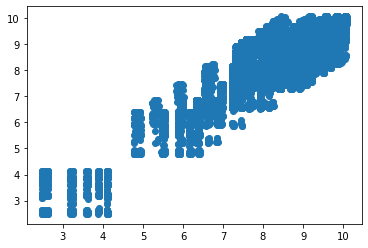

In [79]:
#### Checking the Train Test Accuracy Within Trained Dataset by splitting

#### splitting the Data of DF_Train Datast
X_train,X_test,Y_train,Y_test=split(x_train,y_train_log,test_size=0.30,random_state=100)

DCTr=DecisionTreeRegressor()

DCTr.fit(X_train,Y_train)

#### Predicting the model

train_pred=DCTr.predict(X_train)

DecisionTreetest_pred2=DCTr.predict(X_test)


#### Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_train,train_pred)))
print('R2_score of trained data is:',r2_score(Y_train,train_pred))

print('RMse of test data is:',np.sqrt(mean_squared_error(Y_test,DecisionTreetest_pred2)))
print('R2_score of test data is:',r2_score(Y_test,DecisionTreetest_pred2))

plt.scatter(Y_test,DecisionTreetest_pred2)

without(dropping) User_ID ,without(dropping) Product ID  ,without(dropping) Product category3

RMse of trained data is: 0.3491065048380428
R2_score of trained data is: 0.776179691556968
RMse of test data is: 0.38858655380011087
R2_score of test data is: 0.7285268196010717

without(dropping) User_ID ,without(dropping) Product ID  ,with Product category3

RMse of trained data is: 0.33515978316983214
R2_score of trained data is: 0.7937056140087106
RMse of test data is: 0.39591905981751396
R2_score of test data is: 0.7181849304833543

#with User_ID ,without(dropping) Product ID  ,without(dropping) Product category3

RMse of trained data is: 0.2828691812785219
R2_score of trained data is: 0.8530549791679717
RMse of test data is: 0.40743618115853414
R2_score of test data is: 0.7015506903297437


#with User_ID , without(dropping) Product ID ,with Product category3

RMse of trained data is: 0.2575818457853761
R2_score of trained data is: 0.8781532051222345
RMse of test data is: 0.42402784083354567
R2_score of test data is: 0.6767488055164276

#without(dropping) User_ID ,with Product_ID ,with Product Category3

RMse of trained data is: 0.1772566902582947
R2_score of trained data is: 0.9422982639730458
RMse of test data is: 0.4651957603023602
R2_score of test data is: 0.6109343498526761


#with Product_ID ,with Product Category3

RMse of trained data is: 0.0
R2_score of trained data is: 1.0
RMse of test data is: 0.48995280328139895
R2_score of test data is: 0.5684214146333371

#dropping Product Category 3

RMse of trained data is: 0.0
R2_score of trained data is: 1.0
RMse of test data is: 0.4908691354676953
R2_score of test data is: 0.5668055889518169

#with PCA ,without Product Category 3

RMse of trained data is: 3.0363344121991818e-18
R2_score of trained data is: 1.0
RMse of test data is: 0.5730439403393832
R2_score of test data is: 0.4096259736501362

#with Pca ,with Product Category 3

RMse of trained data is: 1.753028490232922e-18
R2_score of trained data is: 1.0
RMse of test data is: 0.5941048638665927
R2_score of test data is: 0.3654328159398953

RMse of trained data is: 0.34138363097843516
R2_score of trained data is: 0.7873460933000147


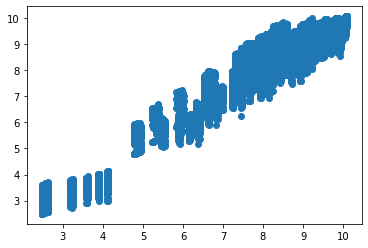

In [272]:
#Model Building For Final TRain Test data given in problem
DCTr=DecisionTreeRegressor()

DCTr.fit(x_train_sc,y_train_log)

# Predicting the model

train_pred=DCTr.predict(x_train_sc)
DecisionTreetest_pred=DCTr.predict(x_test_sc)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train_pred))

plt.scatter(y_train_log,train_pred)


#without(dropping) User_ID ,without(dropping) Product ID  ,with Product category3

RMse of trained data is: 0.34138363097843516
R2_score of trained data is: 0.7873460933000147

#without Product_ID

RMse of trained data is: 0.2690957084789338
R2_score of trained data is: 0.8678699733704436

#with Product_ID

RMse of trained data is: 2.319036906363198e-18
R2_score of trained data is: 1.0

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42,oob_score=True)

rfr.fit(x_train,y_train_log)

# Predicting the model

train_pred=rfr.predict(x_train)
test_pred=rfr.predict(x_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train_pred))


RMse of trained data is: 0.2784003773984237
R2_score of trained data is: 0.858574534003412


### Gradient Boosting Regressor Model

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [60]:
gbr=GradientBoostingRegressor(random_state=42)

gbr.fit(x_train_sc,y_train_log)

# Predicting the model

train_pred=rfr.predict(x_train_sc)
test_pred=rfr.predict(x_test_sc)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_108/38661588.py, line 13)

### SVM REgressor

In [ ]:
#Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [ 0.1, 1, 10], 'gamma': [ 0.1, 1],
     'kernel': ['rbf']}]

In [ ]:


gd_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
gd_search_svr.fit(x_train_sc, y_train_log)

# Predicting the model

train_pred=gd_best_gbr.predict(x_train_sc)
test_pred=gd_best_gbr.predict(x_test_sc)

# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train_pred))


## BEST Model

DEcision tree with RMSE 0.269 and model accuracy is 86.7%

In [152]:
df_sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


### Creating Submission files

In [70]:
df_test_final['Purchase']=DecisionTreetest_pred
df_test_final['Purchase']

550068    15853.000000
550069    10554.000000
550070     8247.090909
550071     3454.000000
550072     1427.000000
              ...     
783662     6824.656863
783663     5589.866667
783664    11449.000000
783665    23714.000000
783666      722.000000
Name: Purchase, Length: 233599, dtype: float64

In [154]:
df_test_final.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [155]:
submission_files=pd.DataFrame()
submission_files["Purchase"]=df_test_final.loc[:,"Purchase"]
submission_files['User_ID']=df_test_final.loc[:,"User_ID"]
submission_files['Product_ID']=df_test_final.loc[:,"Product_ID"]

In [156]:
submission_files =submission_files.reset_index(drop=True)
submission_files

,Purchase,User_ID,Product_ID
0,9.339437,1000004,P00128942
1,9.264260,1000009,P00113442
2,9.012860,1000010,P00288442
3,8.147288,1000010,P00145342
4,7.263330,1000011,P00053842
...,...,...,...
233594,8.783528,1006036,P00118942
233595,8.563326,1006036,P00254642
233596,8.937087,1006036,P00031842
233597,10.073821,1006037,P00124742


In [157]:
df_sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [158]:
#converting to csv file format
submission_files.to_csv('BLackFriday_Sales_Prediction3.csv', index = False)

In [159]:
pd.read_csv('BLackFriday_Sales_Prediction3.csv')

,Purchase,User_ID,Product_ID
0,9.339437,1000004,P00128942
1,9.264260,1000009,P00113442
2,9.012860,1000010,P00288442
3,8.147288,1000010,P00145342
4,7.263330,1000011,P00053842
...,...,...,...
233594,8.783528,1006036,P00118942
233595,8.563326,1006036,P00254642
233596,8.937087,1006036,P00031842
233597,10.073821,1006037,P00124742


In [130]:
df_test_final.shape

(233599, 12)